In [87]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import wrangle as w


In [99]:
def create_x_y(train, validate, test, target):
    """
    This function creates x and y variables for either a decision tree or a random forest, 
    by using the unsplit df, target variable columns name and column to drop, for multiple columns that need to be 
    dropped create a list of the columns0
    The arguments taken in are train, validate, test, target, drop_col=[])
    The function returns x_train, y_train, x_validate, y_validate, x_test, y_test
    """
    # separates train target variable
    x_train = train.drop(columns=[target])
    y_train = train[target]
    # validate 
    x_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    # test
    x_test = test.drop(columns=[target])
    y_test = test[target]
    
    return x_train, y_train, x_validate, y_validate, x_test, y_test

# final test model

def best_model(x_train, y_train, x_validate, y_validate, x_test, y_test):
    '''
    ! WARNING!: Only use this for your final model 
    This function provides a quick print output of the baseling accuracy train, validation, test scores based on your classifier, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate, x_test, y_test
    '''
    rf = RandomForestClassifier(random_state=3, min_samples_leaf=5, max_depth=6)
    rf = rf.fit(x_train, y_train)
    # model.fit(x, y)
    print(f'''
    Accuracy of {rf} on training set: {round(rf.score(x_train, y_train), 2)}
    Accuracy of {rf} on validation set: {round(rf.score(x_validate, y_validate), 2)}
    Accuracy of {rf} on test set: {round(rf.score(x_test, y_test), 2)}
    ''')


####################################### Decision Tree model functions

def best_tree(x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on the decision trees, for easy viewing.
    The function takes the following arguments: logit, x_train, y_train, x_validate, y_validate
    '''
    tree = DecisionTreeClassifier(max_depth=7, random_state=3)

    # model.fit(x, y)
    tree = tree.fit(x_train, y_train)

    print(f'''
    Accuracy of Decision Tree classifier on training set: {round(tree.score(x_train, y_train), 2)}
    Accuracy of Decision Tree classifier on validation set: {round(tree.score(x_validate, y_validate),2)}
    ''')




######################################## Random Forest model functions 

def best_forest(x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on the random forest, for easy viewing.
    The function takes the following arguments: logit, x_train, y_train, x_validate, y_validate
    '''
    rf = RandomForestClassifier(random_state=3, min_samples_leaf=5, max_depth=6)

    # model.fit(x, y)
    rf = rf.fit(x_train, y_train)

    print(f'''
    Accuracy of Random Forest on training set: {round(rf.score(x_train, y_train), 2)}
    Accuracy of Random Forest on validation set: {round(rf.score(x_validate, y_validate),2)}
    ''')


#################################### Logistic Regression model functions 
def logit_accuracy(x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on the logisitics regression, for easy viewing.
    The function takes the following arguments: logit, x_train, y_train, x_validate, y_validate
    '''
    logit = LogisticRegression()

    # model fit 
    logit.fit(x_train, y_train)
    print(f'''

    Accuracy of Logistic Regression on training set: {round(logit.score(x_train, y_train), 2)}
    Accuracy of Logistic Regression on validation set: {round(logit.score(x_validate, y_validate), 2)}
    ''')


####################### KNN model functions
def best_knn(x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on the KNN model, for easy viewing.
    The function takes the following arguments: logit, x_train, y_train, x_validate, y_validate
    '''
    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(x_train, y_train)
    print(f'''
    Accuracy of KNN on training set: {round(knn.score(x_train, y_train),2)}
    Accuracy of KNN on validation set: {round(knn.score(x_validate, y_validate),2)}
    ''')

In [36]:
# clean df
df = w.clean_df()
df.head()

,entity_name,state,entity_type,number_affected,date,breach_type,location,business_associate_present,month,year,day,multi_breached_location,season,spring,summer,winter,business_associate,day_number
0,"Brightline, Inc.",CA,Business Associate,8432,2023-05-26,Hacking/IT Incident,Network Server,Yes,5,2023,Friday,0,Spring,1,0,0,1,5
1,Iowa Department of Health and Human Services,IA,Health Plan,833,2023-05-26,Unauthorized Access/Disclosure,Paper/Films,Yes,5,2023,Friday,0,Spring,1,0,0,1,5
2,Lancaster Orthopedic Group,PA,Healthcare Provider,500,2023-05-26,Hacking/IT Incident,Network Server,No,5,2023,Friday,0,Spring,1,0,0,0,5
3,Harvard Pilgrim Health Care,MA,Health Plan,2550922,2023-05-24,Hacking/IT Incident,Network Server,No,5,2023,Wednesday,0,Spring,1,0,0,0,3
4,"UI Community Home Care, a subsidiary of Univer...",IA,Healthcare Provider,67897,2023-05-24,Hacking/IT Incident,"Electronic Medical Record, Network Server",No,5,2023,Wednesday,1,Spring,1,0,0,0,3


In [166]:
def model_df():
    df = w.clean_df()
    
    # Keep columns
    df = df[["state", "breach_type", "location", "multi_breached_location", "summer"]]
    
    # create dummies
    dummy_df = pd.get_dummies(df[["state", "location"]],
                            drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=["state","location"])

    return df

In [167]:
df_test = model_df()

In [168]:
df_test

,breach_type,multi_breached_location,summer,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,location_Email,"location_Email, Laptop",location_Laptop,"location_Laptop, Other, Other Portable Electronic Device",location_Network Server,"location_Network Server, Other","location_Network Server, Paper/Films",location_Other,location_Other Portable Electronic Device,location_Paper/Films
0,Hacking/IT Incident,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Unauthorized Access/Disclosure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Hacking/IT Incident,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Hacking/IT Incident,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
863,Hacking/IT Incident,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
864,Hacking/IT Incident,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
865,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [169]:
# Creating list of multi-labels: states
state_list = df.state.apply(lambda x: list(x.split("/")))

# Converting it into dataframe and working on it seperately: BREED
state_df =pd.DataFrame({"state":state_list})

# instantiating MultiLabelBinarizer: States
mlb = MultiLabelBinarizer()
state_encoded = pd.DataFrame(mlb.fit_transform(df["state"]),columns=mlb.classes_)


In [170]:
target = "breach_type"

In [171]:
# split data
train, validate, test = w.split_data(df_test, target_variable="breach_type")

In [172]:
train

,breach_type,multi_breached_location,summer,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,location_Email,"location_Email, Laptop",location_Laptop,"location_Laptop, Other, Other Portable Electronic Device",location_Network Server,"location_Network Server, Other","location_Network Server, Paper/Films",location_Other,location_Other Portable Electronic Device,location_Paper/Films
850,Hacking/IT Incident,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
129,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
664,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
218,Unauthorized Access/Disclosure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
638,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Hacking/IT Incident,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
835,Unauthorized Access/Disclosure,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
313,Hacking/IT Incident,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
604,Unauthorized Access/Disclosure,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# features moving to modeling
Location, mulit-breach location, state, summer, individuals

In [173]:
x_train, y_train, x_validate, y_validate, x_test, y_test = create_x_y(train, validate, test, target= "breach_type")

# Baseline is .78

In [174]:
# baseline accuracy 
baseline_accuracy = (train.breach_type == "Hacking/IT Incident").mean()
round(baseline_accuracy, 2)

0.78

In [175]:
def depth_check(x_train, y_train, x_validate, y_validate):
    scores_all = []
    for x in range(1,20):

        tree = DecisionTreeClassifier(max_depth=x, random_state=3)
        tree.fit(x_train, y_train)
        train_acc = tree.score(x_train, y_train)

        #evaluate on validate
        val_acc = tree.score(x_validate, y_validate)

        scores_all.append([x, round(train_acc, 6), round(val_acc, 6)])
        
    scores = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
    
    scores['diff'] = round(scores.train_acc - scores.val_acc, 6)
    return scores


    

def dt_depth_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,20) to help determine the best parameter for max_depth.
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = depth_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with max depth on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')

    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    


def rf_predict(rf, x_train, y_train): 
    '''
    This function takes in the following arguments: tree, x_train, y_train
    Then uses the arguments to make predictions on the train observation,
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = rf.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df



def leaf_check(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,11)-min_samples_leaf and descending (1,11) for max_depth to help determine the best parameters
    '''
    scores_all = []

    for x in range(1,11):

        #make it
        rf = RandomForestClassifier(random_state=3, min_samples_leaf=x, max_depth=11-x)
        #fit it
        rf.fit(x_train, y_train)
        #transform it
        train_acc = rf.score(x_train, y_train)

        #evaluate on my validate data
        val_acc = rf.score(x_validate, y_validate)

        scores_all.append([x, 11-x, round(train_acc, 4), round(val_acc, 4)])

    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf','max_depth','train_acc','val_acc'])
    scores_df['difference'] = round(scores_df.train_acc - scores_df.val_acc, 3)
    return scores_df


def rf_leaf_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,11)-min_samples_leaf and descending (1,11) for max_depth to help determine the best parameters
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = leaf_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with (min_samples_leaf asc. 1,11) and (max depth desc. 1,11) on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')
    ax1.set_xlabel('max depth and min leaf sample')
    ax1.set_ylabel('accuracy')
    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

In [176]:
# 3 
depth_check(x_train, y_train, x_validate, y_validate)

,max_depth,train_acc,val_acc,diff
0,1,0.813102,0.850575,-0.037473
1,2,0.834297,0.844828,-0.010531
2,3,0.845857,0.844828,0.001029
3,4,0.851638,0.856322,-0.004684
4,5,0.859345,0.862069,-0.002724
5,6,0.867052,0.850575,0.016477
6,7,0.876686,0.850575,0.026111
7,8,0.886320,0.844828,0.041492
8,9,0.890173,0.862069,0.028104
9,10,0.894027,0.850575,0.043452


# Decicion Tree - max_depth = 3

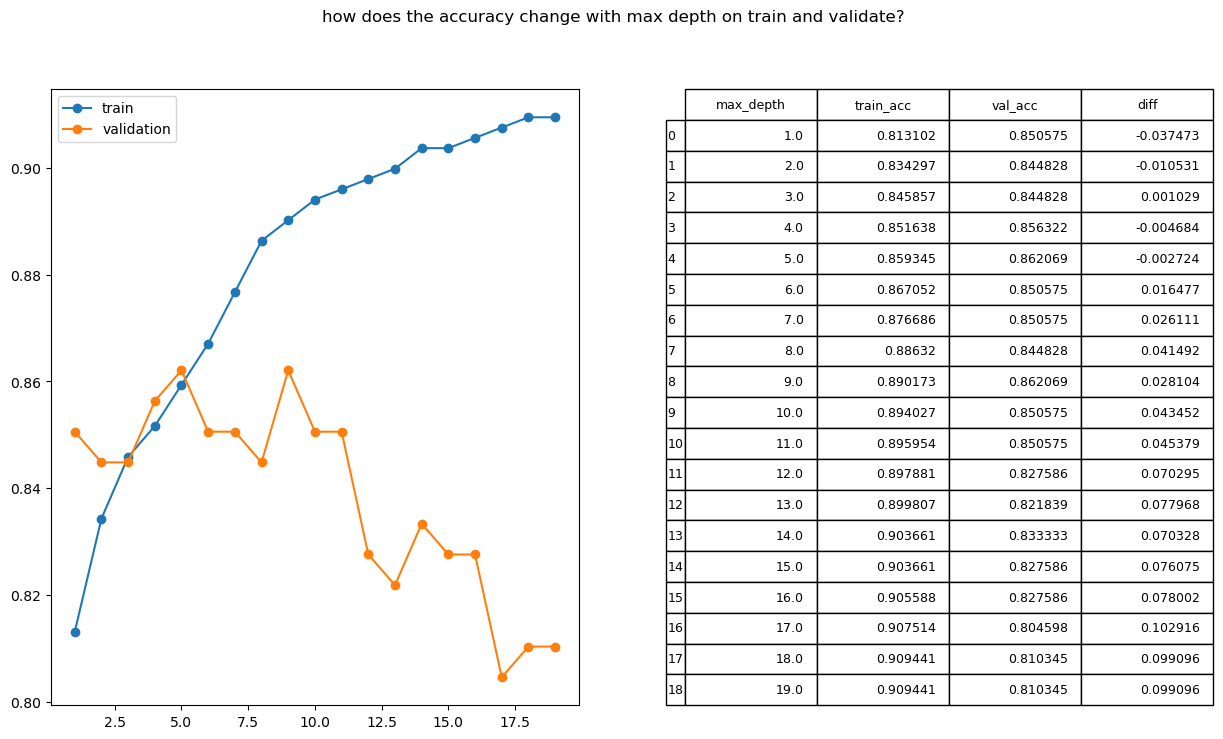

In [177]:
# 3
dt_depth_graph(x_train, y_train, x_validate, y_validate)

In [178]:
tree = DecisionTreeClassifier(max_depth=3, random_state=3)
tree.fit(x_train, y_train)
dt_predict(tree, x_train, y_train)

,Hacking/IT Incident_predict,Improper Disposal_predict,Loss_predict,Theft_predict,Unauthorized Access/Disclosure_predict
Hacking/IT Incident_actual,399,0,0,0,5
Improper Disposal_actual,1,2,0,0,1
Loss_actual,1,0,3,0,1
Theft_actual,6,0,3,3,2
Unauthorized Access/Disclosure_actual,59,0,1,0,32


# Random Forest min_samples_leaf= 1	max_depth= 10

In [179]:
leaf_check(x_train, y_train, x_validate, y_validate)

,min_samples_leaf,max_depth,train_acc,val_acc,difference
0,1,10,0.8786,0.8736,0.005
1,2,9,0.8420,0.8621,-0.020
2,3,8,0.8304,0.8678,-0.037
3,4,7,0.8247,0.8678,-0.043
4,5,6,0.8189,0.8563,-0.037
5,6,5,0.7996,0.8276,-0.028
6,7,4,0.7784,0.7816,-0.003
7,8,3,0.7784,0.7816,-0.003
8,9,2,0.7784,0.7816,-0.003
9,10,1,0.7784,0.7816,-0.003


# The best model so far

In [180]:

#	min_samples_leaf	1 , max_depth 10
leaf_check(x_train, y_train, x_validate, y_validate)

,min_samples_leaf,max_depth,train_acc,val_acc,difference
0,1,10,0.8786,0.8736,0.005
1,2,9,0.8420,0.8621,-0.020
2,3,8,0.8304,0.8678,-0.037
3,4,7,0.8247,0.8678,-0.043
4,5,6,0.8189,0.8563,-0.037
5,6,5,0.7996,0.8276,-0.028
6,7,4,0.7784,0.7816,-0.003
7,8,3,0.7784,0.7816,-0.003
8,9,2,0.7784,0.7816,-0.003
9,10,1,0.7784,0.7816,-0.003


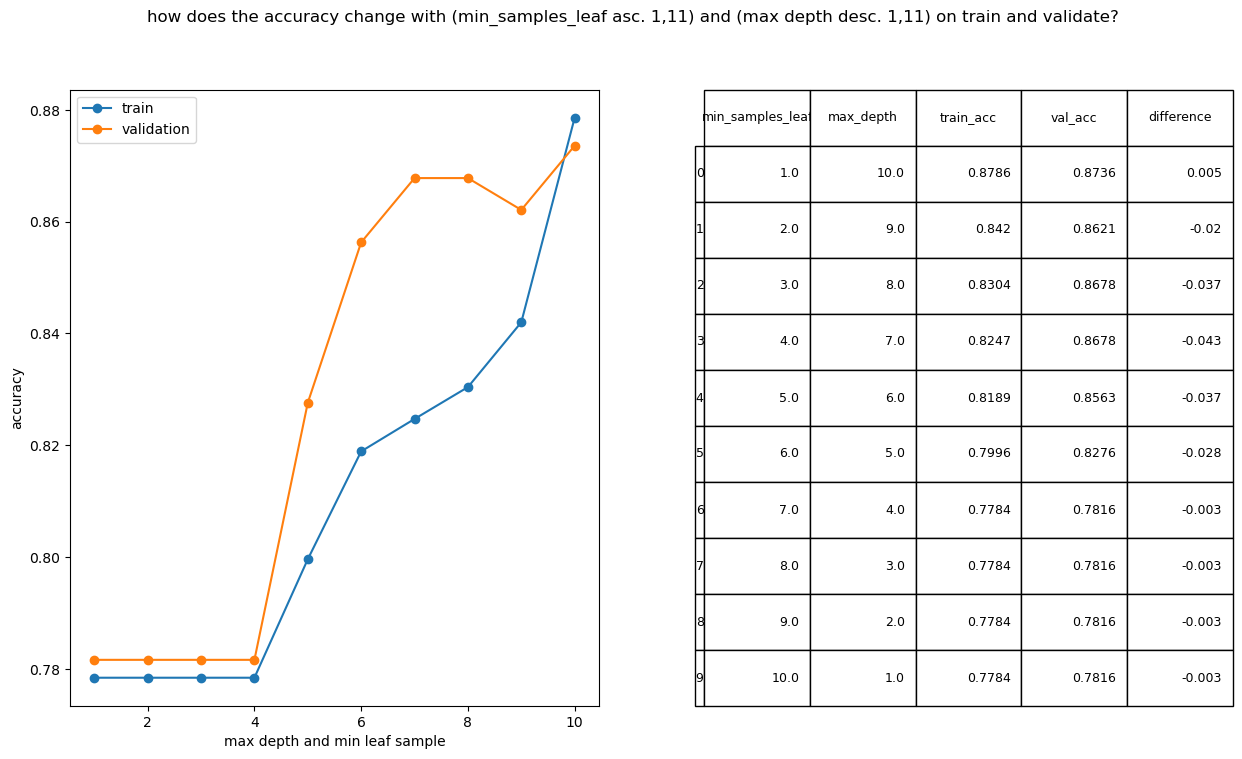

In [181]:
rf_leaf_graph(x_train, y_train, x_validate, y_validate)

In [182]:
def clf_predict(clf, x_train, y_train): 
    '''
    This function takes in the following arguments: clf, x_train, y_train
    Then uses the arguments to make predictions on the train observation and clf
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = clf.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df


In [183]:
clf = RandomForestClassifier(min_samples_leaf=1,  max_depth=10, random_state=3)
clf = clf.fit(x_train, y_train)
clf_predict(clf, x_train, y_train)

,Hacking/IT Incident_predict,Improper Disposal_predict,Loss_predict,Theft_predict,Unauthorized Access/Disclosure_predict
Hacking/IT Incident_actual,403,0,0,0,1
Improper Disposal_actual,1,2,0,0,1
Loss_actual,0,0,4,0,1
Theft_actual,3,0,0,10,1
Unauthorized Access/Disclosure_actual,55,0,0,0,37


In [184]:
clf = DecisionTreeClassifier(max_depth=3, random_state=3)
clf = clf.fit(x_train, y_train)
clf_predict(clf, x_train, y_train)

,Hacking/IT Incident_predict,Improper Disposal_predict,Loss_predict,Theft_predict,Unauthorized Access/Disclosure_predict
Hacking/IT Incident_actual,399,0,0,0,5
Improper Disposal_actual,1,2,0,0,1
Loss_actual,1,0,3,0,1
Theft_actual,6,0,3,3,2
Unauthorized Access/Disclosure_actual,59,0,1,0,32


# Logisitics Regression Model

In [185]:
# create object
logit = LogisticRegression()

# model fit 
logit.fit(x_train, y_train)

LogisticRegression()

In [186]:
logit_2 = LogisticRegression()

# model fit 
logit_2.fit(x_train, y_train)
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit_2.score(x_train, y_train),5)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit_2.score(x_validate, y_validate),5)}
''')


    Accuracy of Logistic Regression classifier on training set: 0.86127
    Accuracy of Logistic Regression classifier on validation set: 0.85057



# KNN

In [187]:
# best KNN
best_knn(x_train, y_train, x_validate, y_validate)


    Accuracy of KNN on training set: 0.81
    Accuracy of KNN on validation set: 0.83
    


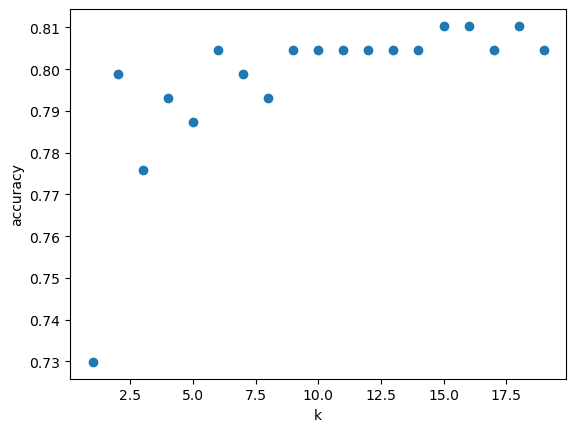

In [188]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

plt.show()


In [189]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [190]:
clf_accuracy(knn, x_train, y_train, x_validate, y_validate)


    Accuracy of KNeighborsClassifier() on training set: 0.84
    Accuracy of KNeighborsClassifier() on validation set: 0.83
    


In [191]:
clf_predict(knn, x_train, y_train)

,Hacking/IT Incident_predict,Improper Disposal_predict,Loss_predict,Theft_predict,Unauthorized Access/Disclosure_predict
Hacking/IT Incident_actual,401,0,0,0,3
Improper Disposal_actual,3,0,0,0,1
Loss_actual,4,0,0,0,1
Theft_actual,7,0,0,4,3
Unauthorized Access/Disclosure_actual,62,0,0,0,30


#	min_samples_leaf	1 , max_depth 10
# leaf_check(x_train, y_train, x_validate, y_validate)
The best model so far is random forest and will most likely continue to the final test model


In [192]:
def best_model(x_train, y_train, x_validate, y_validate, x_test, y_test):
    '''
    ! WARNING!: Only use this for your final model 
    This function provides a quick print output of the baseling accuracy train, validation, test scores based on your classifier, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate, x_test, y_test
    '''
    rf = RandomForestClassifier(min_samples_leaf=1,  max_depth=10, random_state=3)
    rf = rf.fit(x_train, y_train)
    # model.fit(x, y)
    print(f'''
    Accuracy of {rf} on training set: {round(rf.score(x_train, y_train), 2)}
    Accuracy of {rf} on validation set: {round(rf.score(x_validate, y_validate), 2)}
    Accuracy of {rf} on test set: {round(rf.score(x_test, y_test), 2)}
    ''')

In [193]:
# final Model 

In [194]:
best_model(x_train, y_train, x_validate, y_validate, x_test, y_test)


    Accuracy of RandomForestClassifier(max_depth=10, random_state=3) on training set: 0.88
    Accuracy of RandomForestClassifier(max_depth=10, random_state=3) on validation set: 0.87
    Accuracy of RandomForestClassifier(max_depth=10, random_state=3) on test set: 0.82
    


the model beat baseline  by 4 points.

In [ ]:
# recommendations 